In [60]:
import pandas as pd
import numpy as np
import yfinance as yf

In [61]:
import matplotlib.pyplot as plt

In [62]:
#df = pd.read_csv('NSE_TataGlobal.csv')
data = yf.download('TTM').reset_index()

[*********************100%***********************]  1 of 1 completed


In [63]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-27,9.150000,9.280000,9.050000,9.150000,7.971043,379700
1,2004-09-28,8.850000,8.850000,8.650000,8.760000,7.631292,332700
2,2004-09-29,8.760000,8.780000,8.660000,8.750000,7.622580,119800
3,2004-09-30,8.890000,8.970000,8.890000,8.970000,7.814235,166400
4,2004-10-01,9.140000,9.340000,9.120000,9.250000,8.058158,266600
...,...,...,...,...,...,...,...
4395,2022-03-11,27.620001,27.639999,26.120001,26.200001,26.200001,2301600
4396,2022-03-14,26.360001,26.700001,25.469999,25.770000,25.770000,2369000
4397,2022-03-15,26.469999,27.770000,26.469999,27.600000,27.600000,1279000
4398,2022-03-16,27.830000,28.459999,27.500000,28.459999,28.459999,996100


In [64]:
print(data.head())
print('\n Shape of the data:')
print(data.shape)

# setting the index as date
data.index = data['Date']

#df['date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
#df.index = df['date']
#df

#df = df.sort_values(by='Date')
#df

#df = df.sort_index()
#df

        Date  Open  High   Low  Close  Adj Close  Volume
0 2004-09-27  9.15  9.28  9.05   9.15   7.971043  379700
1 2004-09-28  8.85  8.85  8.65   8.76   7.631292  332700
2 2004-09-29  8.76  8.78  8.66   8.75   7.622580  119800
3 2004-09-30  8.89  8.97  8.89   8.97   7.814235  166400
4 2004-10-01  9.14  9.34  9.12   9.25   8.058158  266600

 Shape of the data:
(4400, 7)


In [65]:
#For Year
#year = df['Date']
#year

In [66]:
#df = df.head(5)

In [67]:
close_price = data['Close']
close_price

Date
2004-09-27     9.150000
2004-09-28     8.760000
2004-09-29     8.750000
2004-09-30     8.970000
2004-10-01     9.250000
                ...    
2022-03-11    26.200001
2022-03-14    25.770000
2022-03-15    27.600000
2022-03-16    28.459999
2022-03-17    28.080000
Name: Close, Length: 4400, dtype: float64

In [68]:
close_price.max()

51.470001220703125

In [69]:
split = int(len(data) * 0.8)
train = data[:split]
valid = data[split:]

print(split)
print(len(valid['Date']))
print(len(data))
#df_split = df.sample(frac=0.98, random_state=0)
#df_split = df_split.sort_values(by='Date')
#df_split

3520
880
4400


In [88]:
# close value from df
window_size = 100 # 
  
i = len(data)-100 #  #4350
moving_averages = []
while i > 0: #i < len(df['Close']) - window_size:
    window = data['Close'][i : i + window_size] #  e.g. 248 will not count # split 3519 : 3519 + 15
    window_average = round(sum(window) / window_size, 2)
    moving_averages.append(window_average)
    i = i - 1
    #print(moving_averages)    
#print(moving_averages)
moving_averages.reverse()

In [89]:
#print(moving_averages)

In [90]:
print(len(moving_averages))

4300


In [91]:
#print(len(valid['Date']))
#print(len(valid['Close']))

#print(len(train['Date']))
#print(len(train['Close']))

In [92]:
# Just checking the RMSE does not help us to understand how the model work. 

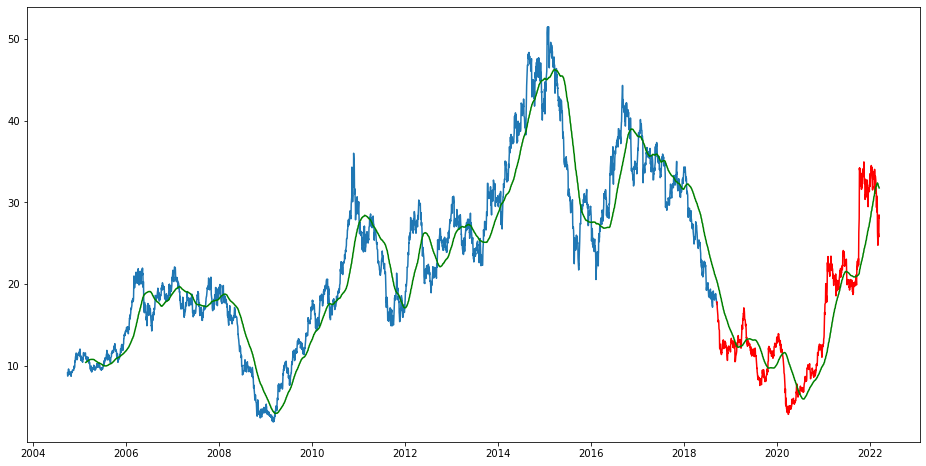

In [93]:
plt.figure(figsize=(16,8))
plt.plot(train['Date'], train['Close'])
plt.plot(valid['Date'], valid['Close'], color='red')

#split_mv = len(valid['Date'])-10
#train_mv = data[:split]
valid_mv = data[100:]

#print(len(valid_mv))
#valid_mv['Predictions'] = 0
#valid_mv['Predictions'] = moving_averages

plt.plot(valid_mv['Date'], moving_averages, color='green')

plt.show()